In [307]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from IPython.display import Image
import numpy as np
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
with MPRester("Jqka7RaOKJvTC6iABC") as me:    
    
    # Structure for material id
    pars = CifParser("mp9368.cif")
    struct = pars.get_structures()[0]
    spg = SpacegroupAnalyzer(struct)
    
    bs = me.get_bandstructure_by_material_id("mp-9368")
    band = Image(filename='band_struct.png')
    
    bsp = BSPlotter(bs)
    data = bsp.bs_plot_data() #données du graphe
    print(bsp)

In [308]:
# Détermination de la bande interdite
gap = bs.get_band_gap()
print("La structure de bandes électroniques provenant du Materials Project est représentée à la section suivante.")
if gap['direct'] == True :
    print("On observe une bande interdite directe.")
if gap['direct'] == False :
    print("On observe une bande interdite indirecte.")
print("L’énergie de la bande interdite est de",gap['energy'],"eV. Sur la figure, cela correspond à la distance entre le point vert et le point rouge.")
print("Le vecteur de transition est",gap['transition'],".")

La structure de bandes électroniques provenant du Materials Project est représentée à la section suivante.
On observe une bande interdite indirecte.
L’énergie de la bande interdite est de 2.3680000000000003 eV. Sur la figure, cela correspond à la distance entre le point vert et le point rouge.
Le vecteur de transition est \Gamma-F .


In [309]:
# Minimum et maximum de la dernière bande de valence
minim = 10
maxim = 0
le = len(((data["ticks"]))["distance"])
a = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
m=0
for j in range (0,le):
    d = (data["ticks"])["distance"][j]
    if (m<9 and d != a[m]):
        a[m+1] = d
        m=m+1
    j = j+1
le2 = len(((data["ticks"]))["label"])
a2 = ["","","","","","","","","",""]
n=0
for k in range (1,le2):
    d2 = (data["ticks"])["label"][k]
    if n==0 :
        a2[0]=(data["ticks"])["label"][0]
        n=1
    if (n<10 and d2 != a2[n-1]):
        a2[n] = d2
        n=n+1
    k = k+1
for i in range (0,9):
    l = len(data.get("energy")[i].get("1")[14])
    y0 = data.get("energy")[i].get("1")[14][0]
    y1 = data.get("energy")[i].get("1")[14][l-1]
    x0 = a[i]
    x1 = a[i+1]
    penteval = (y1-y0)/(x1-x0)
    if abs(penteval) < minim :
        minim = abs(penteval)
        e = i;
    if abs(penteval) > maxim : 
        maxim = abs(penteval)
        c = i;
print("La pente minimale de la dernière bande de valence est de", minim, "et a pour direction", a2[e], "-", a2[e+1])
print("La pente maximale de la dernière bande de valence est de ", maxim, "et a pour direction", a2[c], "-", a2[c+1])

La pente minimale de la dernière bande de valence est de 0.21776311040004978 et a pour direction Z - $\Gamma$
La pente maximale de la dernière bande de valence est de  1.0681426438242605 et a pour direction $B_1$$\mid$B - Z


In [310]:
# Minimum et maximum de la première bande de conduction
minim = 10
maxim = 0
le = len(((data["ticks"]))["distance"])
a = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
m=0
for j in range (0,le):
    d = (data["ticks"])["distance"][j]
    if (m<9 and d != a[m]):
        a[m+1] = d
        m=m+1
    j = j+1
le2 = len(((data["ticks"]))["label"])
a2 = ["","","","","","","","","",""]
n=0
for k in range (1,le2):
    d2 = (data["ticks"])["label"][k]
    if n==0 :
        a2[0]=(data["ticks"])["label"][0]
        n=1
    if (n<10 and d2 != a2[n-1]):
        a2[n] = d2
        n=n+1
    k = k+1
for i in range (0,9):
    l = len(data.get("energy")[i].get("1")[15])
    y0 = data.get("energy")[i].get("1")[15][0]
    y1 = data.get("energy")[i].get("1")[15][l-1]
    x0 = a[i]
    x1 = a[i+1]
    penteval = (y1-y0)/(x1-x0)
    if abs(penteval) < minim :
        minim = abs(penteval)
        e = i;
    if abs(penteval) > maxim : 
        maxim = abs(penteval)
        c = i;
print("La pente minimale de la première bande de conduction est de", minim,"et a pour direction", a2[e], "-", a2[e+1])
print("La pente maximale de la première bande de conduction est de", maxim,"et a pour direction", a2[c], "-", a2[c+1])

La pente minimale de la première bande de conduction est de 0.004333031479665094 et a pour direction $B_1$$\mid$B - Z
La pente maximale de la première bande de conduction est de 2.9079682076473383 et a pour direction X$\mid$Q - F


La figure suivante représente les pentes minimales (-) et maximales (+) de la dernière bande de valence et de la première bande de conduction, repectivement en vert et rouge.


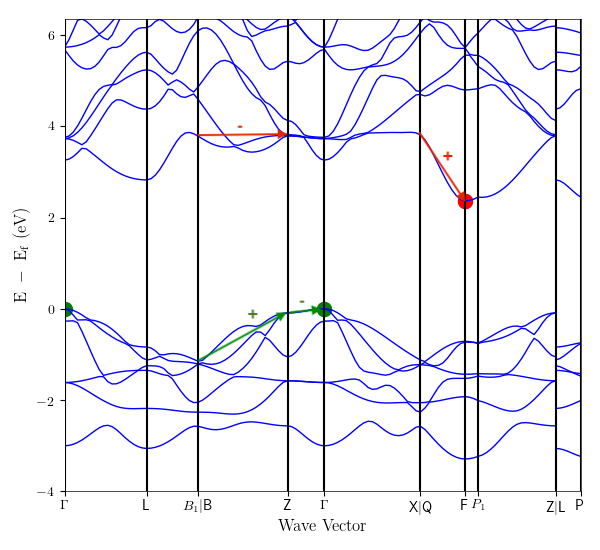

In [311]:
# Représentation graphique
print("La figure suivante représente les pentes minimales (-) et maximales (+) de la dernière bande de valence et de la première bande de conduction, repectivement en vert et rouge.")
display(band)